In [ ]:
#For this final project we would like to explore Spotify music dataset.
#Since we live in the era of big data.We can collect lots of data which allows to infer meaningful results and make informed business decisions. However, as the amount of data increases, it gets trickier to analyze and explore the data. There comes in the power of visualizations which are great tools in exploratory data analysis when used efficiently and appropriately. Visualizations also help to deliver a message to your audience or inform them about your findings. There is no one-fits-all kind of visualization method so certain tasks require different kinds of visualizations. In this post, we will try to explore the Spotify dataset that is available on Kaggle.

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('file:///Users/artemdilanyan/Downloads/data.csv')
print(df.shape)
df.columns

(169909, 19)


Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [ ]:
#Let’s first check if there is any missing value:

In [8]:
df.isna().sum().sum()
0

0

In [ ]:
#First, We can use corr method of pandas to calculate the correlation and use a heatmap to visualize them.

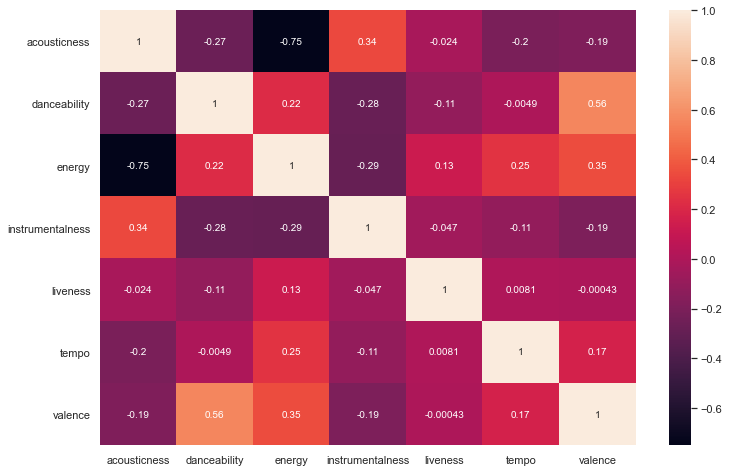

In [9]:
corr = df[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence']].corr()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [ ]:
#Here's the top 10 artists in terms of average energy per song and compare the results with their average acousticness values.

In [10]:
df[['artists','energy','acousticness']].groupby('artists').mean().sort_values(by='energy', ascending=False)[:10]

,energy,acousticness
artists,,
['Ocean Sounds ACE'],1.000000,0.629000
['Darkthrone'],0.999500,0.008002
['Nature Sounds Nature Music'],0.999333,0.640000
['The Relaxing Sounds of Swedish Nature'],0.999000,0.508000
['Tranquility Spree'],0.999000,0.112000
['Lluvia PQ'],0.999000,0.123000
['Thunderbound Productions'],0.999000,0.954000
['Swell Maps'],0.999000,0.000298
['Caramella Girls'],0.998500,0.028700


In [ ]:
#The dataset contains songs from as far back as 1921. We can get an overview how the characteristics of song change over a hundred-year-period.

In [12]:
year_avg = df[['danceability','energy','liveness','acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()
year_avg.head()

,year,danceability,energy,liveness,acousticness,valence
0,1921,0.425661,0.236784,0.215814,0.895823,0.425495
1,1922,0.480000,0.237026,0.238647,0.939236,0.534056
2,1923,0.568462,0.246936,0.236656,0.976329,0.624788
3,1924,0.548654,0.347033,0.237875,0.935575,0.668574
4,1925,0.571890,0.264373,0.243094,0.965422,0.616430


In [ ]:
#Another way is to convert year_avg dataframe to a long dataframe using pandas melt function.

In [13]:
melted = year_avg.melt(id_vars='year')
melted.head()

,year,variable,value
0,1921,danceability,0.425661
1,1922,danceability,0.480000
2,1923,danceability,0.568462
3,1924,danceability,0.548654
4,1925,danceability,0.571890


In [ ]:
#Let’s now see how to create the same plot using the melted dataframe. With adding multiple axes, we used hue parameter which made the syntax simpler. Both of these two ways produce this plot:

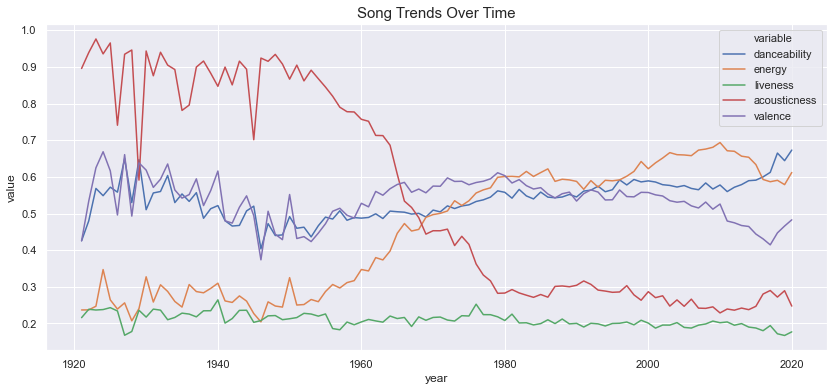

In [15]:
plt.figure(figsize=(14,6))
plt.title("Song Trends Over Time", fontsize=15)
sns.lineplot(x='year', y='value', hue='variable', data=melted)

In [ ]:
#Below is the number of all unique artists on Spotify:

In [17]:
df.artists.nunique()

33375

In [ ]:
#FInally, let’s see the top 7 artists who have the most songs in the dataset.

In [19]:
df.artists.value_counts()[:7]

['Эрнест Хемингуэй']      1215
['Francisco Canaro']       938
['Эрих Мария Ремарк']      781
['Ignacio Corsini']        620
['Frank Sinatra']          592
['Bob Dylan']              539
['The Rolling Stones']     512
Name: artists, dtype: int64